# GAN using MNIST data 
Data is 28x28 pixels. 

Generator model layers: 
* Dense layer 128x7x7
* Conv2D transpose
* Conv2D with sigmoid activation function

Discriminator

In [1]:
from keras.layers import Dense, Conv2D, Flatten, Dropout, LeakyReLU, Reshape, Conv2DTranspose
from keras.optimizers import Adam
from keras.models import Sequential
from keras.datasets.mnist import load_data
import numpy as np
import matplotlib.pyplot as plt

2022-06-07 08:12:56.793584: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-07 08:12:56.793617: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [34]:
def define_discriminator(in_shape=(28,28,1)):
    model = Sequential()
    model.add(Conv2D(64, (3,3), strides=(2,2), 
                    padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(lr=0.02, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt,
                 metrics=['accuracy'])
    return model

In [3]:
def load_real_samples():
    (trainX, _), (_,_) = load_data()
    
    X = np.expand_dims(trainX, axis=-1)
    
    X = X.astype('float32')
    
    X = X / 255.0
    return X

In [4]:
def generate_real_samples(dataset, n_samples): 
    
    ix = np.random.randint(0, dataset.shape[0], n_samples)
    X = dataset[ix]
    y = np.ones((n_samples,1))
    return X, y

In [5]:
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
    half_batch = int(n_batch / 2)
    
    for i in range(n_iter):
        X_real, y_real = generate_real_samples(dataset, half_batch)
#         update discriminator on real samples
        _, real_acc = model.train_on_batch(X_real, y_real)
        X_fake, y_fake = generate_fake_samples(half_batch)
        _, fake_acc = model.train_on_batch(X_fake, y_fake)
        
        print(f'{i+1} real={real_acc*100}% fake={fake_acc*100}%')

In [10]:
model = define_discriminator()

dataset = load_real_samples()

train_discriminator(model, dataset)

2022-06-06 22:13:55.610703: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-06 22:13:55.610779: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-06 22:13:55.610828: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mikiu-xps13): /proc/driver/nvidia/version does not exist
2022-06-06 22:13:55.611436: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/mikiu/Documents/applications_post_PhD/hazy/gan_env/lib/python3.7/site-packages/keras/optimizers/optimizer

1 real=61.71875% fake=2.34375%
2 real=72.65625% fake=3.90625%
3 real=62.5% fake=39.0625%
4 real=63.28125% fake=78.90625%
5 real=56.25% fake=97.65625%
6 real=50.0% fake=100.0%
7 real=48.4375% fake=100.0%
8 real=49.21875% fake=100.0%
9 real=43.75% fake=100.0%
10 real=50.78125% fake=100.0%
11 real=52.34375% fake=100.0%
12 real=58.59375% fake=100.0%
13 real=57.03125% fake=100.0%
14 real=67.1875% fake=100.0%
15 real=73.4375% fake=100.0%
16 real=67.1875% fake=100.0%
17 real=75.78125% fake=100.0%
18 real=76.5625% fake=100.0%
19 real=84.375% fake=100.0%
20 real=85.9375% fake=100.0%
21 real=86.71875% fake=100.0%
22 real=90.625% fake=100.0%
23 real=92.1875% fake=100.0%
24 real=96.875% fake=100.0%
25 real=96.875% fake=100.0%
26 real=96.09375% fake=100.0%
27 real=96.875% fake=100.0%
28 real=94.53125% fake=100.0%
29 real=97.65625% fake=100.0%
30 real=97.65625% fake=100.0%
31 real=99.21875% fake=100.0%
32 real=99.21875% fake=100.0%
33 real=98.4375% fake=100.0%
34 real=100.0% fake=100.0%
35 real=99.2

In [35]:
def define_generator(latent_dim):
    model = Sequential()
    n_nodes = 128 * 7 * 7
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 128)))
    model.add(Conv2DTranspose(128, (4,4), strides=(4,4),
                             padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    return model

In [7]:
def generate_latent_points(latent_dim, n_samples):
    x_input = np.random.randn(latent_dim * n_samples)
    
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [8]:
def generate_fake_samples(g_model, latent_dim, n_samples):
    
    x_input = generate_latent_points(latent_dim, n_samples)
    
    X = g_model.predict(x_input)
#     creating 'fake' class labels
    y = np.zeros((n_samples, 1))
    return X, y

2022-06-07 07:59:29.171258: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-07 07:59:29.171395: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-07 07:59:29.171531: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mikiu-xps13): /proc/driver/nvidia/version does not exist
2022-06-07 07:59:29.172300: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 137ms/step


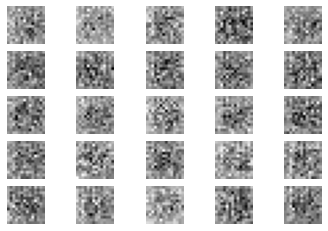

In [10]:
latent_dim = 100
model = define_generator(latent_dim)
n_samples = 25

X, _ = generate_fake_samples(model, latent_dim, n_samples)
for i in range(n_samples):
    plt.subplot(5,5, 1 + i)
    plt.axis('off')
    plt.imshow(X[i, :, :, 0], cmap='gray_r')
    
    

In [36]:
def define_gan(g_model, d_model):
#     make weights in the discrminator not trainable 
    d_model.trainable = False
    
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    opt = Adam(learning_rate=0.02, beta_1=0.5)
    model.compile(optimizer=opt, loss='binary_crossentropy')
    return model

In [39]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    
    for i in range(n_epochs):
        
        for j in range(bat_per_epo):
            
            X_real, y_real = generate_real_samples(dataset, half_batch)
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            
            X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
            
            d_loss, _ = d_model.train_on_batch(X, y)
            
            X_gan = generate_latent_points(latent_dim, n_batch)
            
            y_gan = np.ones((n_batch, 1))
            
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            
            print(f'{i+1}, {j+1} {bat_per_epo}, d={d_loss}%, g={g_loss}%')
            
        summarise_performance(i, g_model, d_model, dataset, latent_dim)

In [11]:
def save_plot(examples, epoch, n=10):
    #     plot images
    for i in range(n*n):
        plt.subplot(n, n, 1 + i)
        plt.axis('off')
        plt.imshow(examples[i, :, :, 0], cmap='gray_r')
    filename = f'generated_plot_{epoch+1}.png'
    plt.savefig(filename)
    plt.close()

In [12]:
def summarise_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
    X_real, y_real = generate_real_samples(dataset, n_samples)
#     evalute the discriminator on the real samples
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
#     prepare fake samples
    X_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
#     evaluate discriminator on fake samples
    _, acc_fake = d_model.evaluate(X_fake, y_fake, verbose=0)
    print(f'Accuracy real: {acc_real*100}%, fake: {acc_fake*100}%')
    save_plot(X_fake, epoch)
    filename = f'generator_model_{epoch+1}.h5'
    g_model.save(filename)
    

In [31]:
latent_dim = 100

d_model = define_discriminator()

g_model = define_generator(latent_dim)

gan_model = define_gan(g_model, d_model)

dataset = load_real_samples()

In [32]:
gan_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_19 (Sequential)  (None, 28, 28, 1)         902017    
                                                                 
 sequential_18 (Sequential)  (None, 1)                 13185     
                                                                 
Total params: 915,202
Trainable params: 902,017
Non-trainable params: 13,185
_________________________________________________________________


In [40]:
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=20)

4/4 [==============================] - 0s 58ms/step
1, 1 234, d=0.6584932804107666%, g=0.7597906589508057%
4/4 [==============================] - 0s 51ms/step
1, 2 234, d=0.678852915763855%, g=0.7601131200790405%
4/4 [==============================] - 0s 59ms/step
1, 3 234, d=0.6677154302597046%, g=0.744288444519043%
4/4 [==============================] - 0s 61ms/step
1, 4 234, d=0.6681122779846191%, g=0.7734832167625427%
4/4 [==============================] - 0s 68ms/step
1, 5 234, d=0.6528074741363525%, g=0.7549277544021606%
4/4 [==============================] - 0s 65ms/step
1, 6 234, d=0.6472052335739136%, g=0.7659148573875427%
4/4 [==============================] - 0s 60ms/step
1, 7 234, d=0.6562923789024353%, g=0.7507719993591309%
4/4 [==============================] - 0s 61ms/step
1, 8 234, d=0.6682363748550415%, g=0.7660255432128906%
4/4 [==============================] - 0s 66ms/step
1, 9 234, d=0.6513336896896362%, g=0.7421340346336365%
4/4 [==============================] - 

4/4 [==============================] - 0s 67ms/step
1, 153 234, d=0.6647783517837524%, g=0.7435834407806396%
4/4 [==============================] - 0s 72ms/step
1, 154 234, d=0.662301778793335%, g=0.7413895130157471%
4/4 [==============================] - 0s 63ms/step
1, 155 234, d=0.6693928241729736%, g=0.7401866316795349%
4/4 [==============================] - 0s 64ms/step
1, 156 234, d=0.6678107976913452%, g=0.7552919387817383%
4/4 [==============================] - 0s 65ms/step
1, 157 234, d=0.6574590802192688%, g=0.7473455667495728%
4/4 [==============================] - 0s 66ms/step
1, 158 234, d=0.6666769981384277%, g=0.7385356426239014%
4/4 [==============================] - 0s 70ms/step
1, 159 234, d=0.6609869003295898%, g=0.741415798664093%
4/4 [==============================] - 0s 66ms/step
1, 160 234, d=0.6689199805259705%, g=0.7404595017433167%
4/4 [==============================] - 0s 63ms/step
1, 161 234, d=0.6568588018417358%, g=0.7504605650901794%
4/4 [================

4/4 [==============================] - 0s 67ms/step
2, 67 234, d=0.6789114475250244%, g=0.7345076203346252%
4/4 [==============================] - 0s 66ms/step
2, 68 234, d=0.6935702562332153%, g=0.734173059463501%
4/4 [==============================] - 0s 64ms/step
2, 69 234, d=0.6832079887390137%, g=0.7215473651885986%
4/4 [==============================] - 0s 63ms/step
2, 70 234, d=0.6744569540023804%, g=0.7170541286468506%
4/4 [==============================] - 0s 63ms/step
2, 71 234, d=0.682586133480072%, g=0.7196763157844543%
4/4 [==============================] - 0s 64ms/step
2, 72 234, d=0.6772326231002808%, g=0.7406982183456421%
4/4 [==============================] - 0s 64ms/step
2, 73 234, d=0.6820758581161499%, g=0.7458581924438477%
4/4 [==============================] - 0s 65ms/step
2, 74 234, d=0.6683963537216187%, g=0.7424834966659546%
4/4 [==============================] - 0s 66ms/step
2, 75 234, d=0.6856061220169067%, g=0.756233811378479%
4/4 [==========================

4/4 [==============================] - 0s 65ms/step
2, 143 234, d=0.7003153562545776%, g=0.7235645055770874%
4/4 [==============================] - 0s 63ms/step
2, 144 234, d=0.6802308559417725%, g=0.7309407591819763%
4/4 [==============================] - 0s 65ms/step
2, 145 234, d=0.6913398504257202%, g=0.7143219113349915%
4/4 [==============================] - 0s 65ms/step
2, 146 234, d=0.6744577884674072%, g=0.7092884182929993%
4/4 [==============================] - 0s 65ms/step
2, 147 234, d=0.6942360401153564%, g=0.7308391332626343%
4/4 [==============================] - 0s 66ms/step
2, 148 234, d=0.6879652738571167%, g=0.7210900783538818%
4/4 [==============================] - 0s 64ms/step
2, 149 234, d=0.6863763332366943%, g=0.7174206972122192%
4/4 [==============================] - 0s 65ms/step
2, 150 234, d=0.6974563598632812%, g=0.7155225872993469%
4/4 [==============================] - 0s 64ms/step
2, 151 234, d=0.716495931148529%, g=0.7214372158050537%
4/4 [===============

4/4 [==============================] - 0s 62ms/step
3, 57 234, d=0.6627359390258789%, g=0.7321523427963257%
4/4 [==============================] - 0s 60ms/step
3, 58 234, d=0.6656714677810669%, g=0.7259092330932617%
4/4 [==============================] - 0s 59ms/step
3, 59 234, d=0.6603907942771912%, g=0.7300519943237305%
4/4 [==============================] - 0s 60ms/step
3, 60 234, d=0.671287477016449%, g=0.7399492263793945%
4/4 [==============================] - 0s 60ms/step
3, 61 234, d=0.656989574432373%, g=0.7300667762756348%
4/4 [==============================] - 0s 60ms/step
3, 62 234, d=0.6543722152709961%, g=0.7518610954284668%
4/4 [==============================] - 0s 58ms/step
3, 63 234, d=0.6722177267074585%, g=0.7525315284729004%
4/4 [==============================] - 0s 62ms/step
3, 64 234, d=0.6627882719039917%, g=0.7456738948822021%
4/4 [==============================] - 0s 60ms/step
3, 65 234, d=0.6578049063682556%, g=0.7604469060897827%
4/4 [=========================

4/4 [==============================] - 0s 63ms/step
3, 133 234, d=0.6576694250106812%, g=0.7481924295425415%
4/4 [==============================] - 0s 63ms/step
3, 134 234, d=0.6535487174987793%, g=0.7417043447494507%
4/4 [==============================] - 0s 61ms/step
3, 135 234, d=0.6581427454948425%, g=0.739982545375824%
4/4 [==============================] - 0s 62ms/step
3, 136 234, d=0.6609344482421875%, g=0.7387641668319702%
4/4 [==============================] - 0s 61ms/step
3, 137 234, d=0.6642258167266846%, g=0.7389559745788574%
4/4 [==============================] - 0s 62ms/step
3, 138 234, d=0.660047173500061%, g=0.7417497038841248%
4/4 [==============================] - 0s 62ms/step
3, 139 234, d=0.6518803834915161%, g=0.756524920463562%
4/4 [==============================] - 0s 65ms/step
3, 140 234, d=0.6697182059288025%, g=0.7476339340209961%
4/4 [==============================] - 0s 61ms/step
3, 141 234, d=0.6575189232826233%, g=0.7279914617538452%
4/4 [=================

4/4 [==============================] - 0s 70ms/step
4, 47 234, d=0.6775638461112976%, g=0.7535252571105957%
4/4 [==============================] - 0s 63ms/step
4, 48 234, d=0.6731854677200317%, g=0.7477302551269531%
4/4 [==============================] - 0s 61ms/step
4, 49 234, d=0.6844995021820068%, g=0.7302514314651489%
4/4 [==============================] - 0s 64ms/step
4, 50 234, d=0.7051397562026978%, g=0.7154937982559204%
4/4 [==============================] - 0s 61ms/step
4, 51 234, d=0.6800832748413086%, g=0.7049035429954529%
4/4 [==============================] - 0s 60ms/step
4, 52 234, d=0.6809737682342529%, g=0.7177257537841797%
4/4 [==============================] - 0s 61ms/step
4, 53 234, d=0.6758312582969666%, g=0.710167646408081%
4/4 [==============================] - 0s 61ms/step
4, 54 234, d=0.6894000172615051%, g=0.7262951731681824%
4/4 [==============================] - 0s 62ms/step
4, 55 234, d=0.6844062209129333%, g=0.7170349359512329%
4/4 [========================

4/4 [==============================] - 0s 63ms/step
4, 123 234, d=0.688356339931488%, g=0.7248101234436035%
4/4 [==============================] - 0s 60ms/step
4, 124 234, d=0.6833285093307495%, g=0.7212259769439697%
4/4 [==============================] - 0s 60ms/step
4, 125 234, d=0.6856046319007874%, g=0.7215707302093506%
4/4 [==============================] - 0s 61ms/step
4, 126 234, d=0.677961528301239%, g=0.7264783382415771%
4/4 [==============================] - 0s 59ms/step
4, 127 234, d=0.669869065284729%, g=0.740458071231842%
4/4 [==============================] - 0s 60ms/step
4, 128 234, d=0.6843895316123962%, g=0.7445214986801147%
4/4 [==============================] - 0s 59ms/step
4, 129 234, d=0.6869465708732605%, g=0.7234850525856018%
4/4 [==============================] - 0s 59ms/step
4, 130 234, d=0.6712067127227783%, g=0.7285913228988647%
4/4 [==============================] - 0s 61ms/step
4, 131 234, d=0.6786583662033081%, g=0.7300044298171997%
4/4 [==================

4/4 [==============================] - 0s 64ms/step
5, 37 234, d=0.6648540496826172%, g=0.7507186532020569%
4/4 [==============================] - 0s 70ms/step
5, 38 234, d=0.6495130062103271%, g=0.7195773124694824%
4/4 [==============================] - 0s 76ms/step
5, 39 234, d=0.6619658470153809%, g=0.7354291081428528%
4/4 [==============================] - 1s 132ms/step
5, 40 234, d=0.6654511094093323%, g=0.7597827911376953%
4/4 [==============================] - 0s 65ms/step
5, 41 234, d=0.6525467038154602%, g=0.7442436218261719%
4/4 [==============================] - 0s 67ms/step
5, 42 234, d=0.6618468761444092%, g=0.7464890480041504%
4/4 [==============================] - 0s 63ms/step
5, 43 234, d=0.6566457748413086%, g=0.7240948677062988%
4/4 [==============================] - 0s 68ms/step
5, 44 234, d=0.6527981758117676%, g=0.7357826232910156%
4/4 [==============================] - 0s 106ms/step
5, 45 234, d=0.6628316640853882%, g=0.7370358109474182%
4/4 [=====================

4/4 [==============================] - 0s 62ms/step
5, 113 234, d=0.6817508339881897%, g=0.723307728767395%
4/4 [==============================] - 0s 61ms/step
5, 114 234, d=0.6916877031326294%, g=0.7123031616210938%
4/4 [==============================] - 0s 83ms/step
5, 115 234, d=0.6754157543182373%, g=0.7188399434089661%
4/4 [==============================] - 0s 69ms/step
5, 116 234, d=0.6857070922851562%, g=0.7349967956542969%
4/4 [==============================] - 0s 70ms/step
5, 117 234, d=0.7030556201934814%, g=0.7211018800735474%
4/4 [==============================] - 0s 63ms/step
5, 118 234, d=0.6896456480026245%, g=0.7189921140670776%
4/4 [==============================] - 0s 68ms/step
5, 119 234, d=0.6869789361953735%, g=0.7153202295303345%
4/4 [==============================] - 0s 61ms/step
5, 120 234, d=0.67519211769104%, g=0.7124238014221191%
4/4 [==============================] - 0s 71ms/step
5, 121 234, d=0.6849038600921631%, g=0.7113823890686035%
4/4 [=================

4/4 [==============================] - 0s 64ms/step
6, 27 234, d=0.6802289485931396%, g=0.7337047457695007%
4/4 [==============================] - 0s 63ms/step
6, 28 234, d=0.6676754951477051%, g=0.7166351079940796%
4/4 [==============================] - 0s 61ms/step
6, 29 234, d=0.6882688999176025%, g=0.7118362784385681%
4/4 [==============================] - 0s 63ms/step
6, 30 234, d=0.6700289845466614%, g=0.7230668663978577%
4/4 [==============================] - 0s 64ms/step
6, 31 234, d=0.6905313730239868%, g=0.7131243944168091%
4/4 [==============================] - 0s 62ms/step
6, 32 234, d=0.6892914772033691%, g=0.7234537601470947%
4/4 [==============================] - 0s 64ms/step
6, 33 234, d=0.6776313781738281%, g=0.7168564200401306%
4/4 [==============================] - 0s 69ms/step
6, 34 234, d=0.6775321960449219%, g=0.7230003476142883%
4/4 [==============================] - 0s 60ms/step
6, 35 234, d=0.6786856651306152%, g=0.7248589992523193%
4/4 [=======================

4/4 [==============================] - 0s 62ms/step
6, 103 234, d=0.6780950427055359%, g=0.7528183460235596%
4/4 [==============================] - 0s 63ms/step
6, 104 234, d=0.6837656497955322%, g=0.7404762506484985%
4/4 [==============================] - 0s 62ms/step
6, 105 234, d=0.6809673309326172%, g=0.7141931653022766%
4/4 [==============================] - 0s 62ms/step
6, 106 234, d=0.6816311478614807%, g=0.7062686085700989%
4/4 [==============================] - 0s 61ms/step
6, 107 234, d=0.675555408000946%, g=0.7360249757766724%
4/4 [==============================] - 0s 61ms/step
6, 108 234, d=0.6803036332130432%, g=0.7262707352638245%
4/4 [==============================] - 0s 62ms/step
6, 109 234, d=0.6746395826339722%, g=0.7396496534347534%
4/4 [==============================] - 0s 82ms/step
6, 110 234, d=0.674834132194519%, g=0.7283296585083008%
4/4 [==============================] - 0s 64ms/step
6, 111 234, d=0.671076774597168%, g=0.7129492163658142%
4/4 [=================

6, 178 234, d=0.6863465309143066%, g=0.7161110043525696%
4/4 [==============================] - 0s 69ms/step
6, 179 234, d=0.6690582633018494%, g=0.7326286435127258%
4/4 [==============================] - 0s 61ms/step
6, 180 234, d=0.6827924251556396%, g=0.7169895172119141%
4/4 [==============================] - 0s 64ms/step
6, 181 234, d=0.6857317090034485%, g=0.7074611783027649%
4/4 [==============================] - 0s 60ms/step
6, 182 234, d=0.680716872215271%, g=0.7250325679779053%
4/4 [==============================] - 0s 61ms/step
6, 183 234, d=0.681371808052063%, g=0.7211630344390869%
4/4 [==============================] - 0s 63ms/step
6, 184 234, d=0.6868060827255249%, g=0.7063947916030884%
4/4 [==============================] - 0s 61ms/step
6, 185 234, d=0.6711821556091309%, g=0.6953967809677124%
4/4 [==============================] - 0s 61ms/step
6, 186 234, d=0.6789783835411072%, g=0.7076717615127563%
4/4 [==============================] - 0s 62ms/step
6, 187 234, d=0.68514

4/4 [==============================] - 0s 62ms/step
7, 93 234, d=0.6731332540512085%, g=0.6955618858337402%
4/4 [==============================] - 0s 60ms/step
7, 94 234, d=0.6795006990432739%, g=0.7039128541946411%
4/4 [==============================] - 0s 62ms/step
7, 95 234, d=0.6789723634719849%, g=0.7053229212760925%
4/4 [==============================] - 0s 61ms/step
7, 96 234, d=0.6891768574714661%, g=0.7169082164764404%
4/4 [==============================] - 0s 63ms/step
7, 97 234, d=0.6841511130332947%, g=0.7040687799453735%
4/4 [==============================] - 0s 66ms/step
7, 98 234, d=0.6939877271652222%, g=0.7127444744110107%
4/4 [==============================] - 0s 68ms/step
7, 99 234, d=0.6814094185829163%, g=0.7175874710083008%
4/4 [==============================] - 0s 64ms/step
7, 100 234, d=0.6880559921264648%, g=0.7253626585006714%
4/4 [==============================] - 0s 63ms/step
7, 101 234, d=0.6874874830245972%, g=0.708685040473938%
4/4 [======================

4/4 [==============================] - 0s 65ms/step
8, 7 234, d=0.683488130569458%, g=0.7230166792869568%
4/4 [==============================] - 0s 63ms/step
8, 8 234, d=0.6778596639633179%, g=0.7259343862533569%
4/4 [==============================] - 0s 64ms/step
8, 9 234, d=0.6836795210838318%, g=0.7224380373954773%
4/4 [==============================] - 0s 63ms/step
8, 10 234, d=0.6769768595695496%, g=0.7091922760009766%
4/4 [==============================] - 0s 66ms/step
8, 11 234, d=0.6828097105026245%, g=0.7074048519134521%
4/4 [==============================] - 0s 64ms/step
8, 12 234, d=0.6864196062088013%, g=0.7079955339431763%
4/4 [==============================] - 0s 65ms/step
8, 13 234, d=0.6849803924560547%, g=0.69947350025177%
4/4 [==============================] - 0s 67ms/step
8, 14 234, d=0.6823724508285522%, g=0.6974833011627197%
4/4 [==============================] - 0s 67ms/step
8, 15 234, d=0.6802500486373901%, g=0.6979047060012817%
4/4 [=============================

4/4 [==============================] - 0s 73ms/step
8, 83 234, d=0.6821753978729248%, g=0.693456768989563%
4/4 [==============================] - 0s 64ms/step
8, 84 234, d=0.6759544610977173%, g=0.7011449337005615%
4/4 [==============================] - 0s 66ms/step
8, 85 234, d=0.6824951767921448%, g=0.7055832743644714%
4/4 [==============================] - 0s 65ms/step
8, 86 234, d=0.6911410689353943%, g=0.7057754993438721%
4/4 [==============================] - 0s 64ms/step
8, 87 234, d=0.686165988445282%, g=0.7038416266441345%
4/4 [==============================] - 0s 97ms/step
8, 88 234, d=0.6815090179443359%, g=0.7125304341316223%
4/4 [==============================] - 0s 68ms/step
8, 89 234, d=0.6789698600769043%, g=0.7074788808822632%
4/4 [==============================] - 0s 65ms/step
8, 90 234, d=0.6802314519882202%, g=0.7095205783843994%
4/4 [==============================] - 0s 64ms/step
8, 91 234, d=0.6765148043632507%, g=0.7037648558616638%
4/4 [=========================

4/4 [==============================] - 0s 65ms/step
8, 159 234, d=0.6834378242492676%, g=0.7691998481750488%
4/4 [==============================] - 0s 64ms/step
8, 160 234, d=0.6792764663696289%, g=0.7464770674705505%
4/4 [==============================] - 0s 68ms/step
8, 161 234, d=0.6830041408538818%, g=0.7239456176757812%
4/4 [==============================] - 0s 63ms/step
8, 162 234, d=0.6834080219268799%, g=0.7297960519790649%
4/4 [==============================] - 0s 65ms/step
8, 163 234, d=0.670224130153656%, g=0.7309507727622986%
4/4 [==============================] - 0s 64ms/step
8, 164 234, d=0.6803082823753357%, g=0.7359987497329712%
4/4 [==============================] - 0s 66ms/step
8, 165 234, d=0.6917457580566406%, g=0.7153803706169128%
4/4 [==============================] - 0s 63ms/step
8, 166 234, d=0.6963375210762024%, g=0.6974111199378967%
4/4 [==============================] - 0s 64ms/step
8, 167 234, d=0.6794325113296509%, g=0.6779407858848572%
4/4 [===============

4/4 [==============================] - 0s 67ms/step
9, 74 234, d=0.6917040348052979%, g=0.6880072951316833%
4/4 [==============================] - 0s 66ms/step
9, 75 234, d=0.6891909837722778%, g=0.6709284782409668%
4/4 [==============================] - 0s 65ms/step
9, 76 234, d=0.6830756664276123%, g=0.6721935272216797%
4/4 [==============================] - 0s 64ms/step
9, 77 234, d=0.6845515966415405%, g=0.6896910667419434%
4/4 [==============================] - 0s 65ms/step
9, 78 234, d=0.675491213798523%, g=0.6969374418258667%
4/4 [==============================] - 0s 68ms/step
9, 79 234, d=0.6702613234519958%, g=0.7112716436386108%
4/4 [==============================] - 0s 77ms/step
9, 80 234, d=0.6703184843063354%, g=0.7134485840797424%
4/4 [==============================] - 0s 68ms/step
9, 81 234, d=0.6678797602653503%, g=0.7124471664428711%
4/4 [==============================] - 0s 99ms/step
9, 82 234, d=0.6859395503997803%, g=0.7267372608184814%
4/4 [========================

4/4 [==============================] - 0s 62ms/step
9, 150 234, d=0.6888267993927002%, g=0.6809485554695129%
4/4 [==============================] - 0s 62ms/step
9, 151 234, d=0.6835286617279053%, g=0.6931992769241333%
4/4 [==============================] - 0s 63ms/step
9, 152 234, d=0.6792950630187988%, g=0.6980918645858765%
4/4 [==============================] - 0s 63ms/step
9, 153 234, d=0.6793330907821655%, g=0.688968300819397%
4/4 [==============================] - 0s 63ms/step
9, 154 234, d=0.6916950941085815%, g=0.7084471583366394%
4/4 [==============================] - 0s 62ms/step
9, 155 234, d=0.6789244413375854%, g=0.6956325769424438%
4/4 [==============================] - 0s 66ms/step
9, 156 234, d=0.6763545274734497%, g=0.7061640024185181%
4/4 [==============================] - 0s 62ms/step
9, 157 234, d=0.6825098991394043%, g=0.714524507522583%
4/4 [==============================] - 0s 62ms/step
9, 158 234, d=0.6819335222244263%, g=0.7078760862350464%
4/4 [================

4/4 [==============================] - 0s 68ms/step
10, 64 234, d=0.6790670156478882%, g=0.7043890953063965%
4/4 [==============================] - 0s 61ms/step
10, 65 234, d=0.6763788461685181%, g=0.6981643438339233%
4/4 [==============================] - 0s 61ms/step
10, 66 234, d=0.6871158480644226%, g=0.720137357711792%
4/4 [==============================] - 0s 60ms/step
10, 67 234, d=0.6739022135734558%, g=0.7215943336486816%
4/4 [==============================] - 0s 60ms/step
10, 68 234, d=0.6785445213317871%, g=0.7095059156417847%
4/4 [==============================] - 0s 62ms/step
10, 69 234, d=0.6849775314331055%, g=0.7225032448768616%
4/4 [==============================] - 0s 62ms/step
10, 70 234, d=0.674184262752533%, g=0.7199128866195679%
4/4 [==============================] - 0s 61ms/step
10, 71 234, d=0.6874508857727051%, g=0.7209599018096924%
4/4 [==============================] - 0s 64ms/step
10, 72 234, d=0.6758462190628052%, g=0.7258248329162598%
4/4 [================

4/4 [==============================] - 0s 62ms/step
10, 139 234, d=0.6799992322921753%, g=0.7211644649505615%
4/4 [==============================] - 0s 62ms/step
10, 140 234, d=0.6691917777061462%, g=0.7138198614120483%
4/4 [==============================] - 0s 61ms/step
10, 141 234, d=0.6754728555679321%, g=0.7195673584938049%
4/4 [==============================] - 0s 60ms/step
10, 142 234, d=0.6763866543769836%, g=0.7168604135513306%
4/4 [==============================] - 0s 61ms/step
10, 143 234, d=0.6714698076248169%, g=0.7339585423469543%
4/4 [==============================] - 0s 61ms/step
10, 144 234, d=0.6721957921981812%, g=0.7271599769592285%
4/4 [==============================] - 0s 60ms/step
10, 145 234, d=0.6735059022903442%, g=0.7318572998046875%
4/4 [==============================] - 0s 65ms/step
10, 146 234, d=0.6678423881530762%, g=0.7287470102310181%
4/4 [==============================] - 0s 63ms/step
10, 147 234, d=0.6685174703598022%, g=0.7307968735694885%
4/4 [=====

4/4 [==============================] - 0s 63ms/step
10, 214 234, d=0.6777316927909851%, g=0.7145002484321594%
4/4 [==============================] - 0s 60ms/step
10, 215 234, d=0.6895214915275574%, g=0.7192565202713013%
4/4 [==============================] - 0s 64ms/step
10, 216 234, d=0.6950278282165527%, g=0.7203943729400635%
4/4 [==============================] - 0s 61ms/step
10, 217 234, d=0.6846448183059692%, g=0.7315535545349121%
4/4 [==============================] - 0s 63ms/step
10, 218 234, d=0.685589075088501%, g=0.7376072406768799%
4/4 [==============================] - 0s 64ms/step
10, 219 234, d=0.6862763166427612%, g=0.7532888650894165%
4/4 [==============================] - 0s 62ms/step
10, 220 234, d=0.6830601096153259%, g=0.7709797024726868%
4/4 [==============================] - 0s 60ms/step
10, 221 234, d=0.6887960433959961%, g=0.7494373321533203%
4/4 [==============================] - 0s 60ms/step
10, 222 234, d=0.6660503149032593%, g=0.7485108971595764%
4/4 [======

4/4 [==============================] - 0s 86ms/step
11, 53 234, d=0.6801142692565918%, g=0.7442567944526672%
4/4 [==============================] - 0s 69ms/step
11, 54 234, d=0.6768103837966919%, g=0.7360566258430481%
4/4 [==============================] - 0s 63ms/step
11, 55 234, d=0.6790690422058105%, g=0.7325795888900757%
4/4 [==============================] - 0s 61ms/step
11, 56 234, d=0.6771528124809265%, g=0.7270697355270386%
4/4 [==============================] - 0s 72ms/step
11, 57 234, d=0.6757806539535522%, g=0.7273592352867126%
4/4 [==============================] - 0s 64ms/step
11, 58 234, d=0.6694223880767822%, g=0.7292569279670715%
4/4 [==============================] - 0s 63ms/step
11, 59 234, d=0.6713025569915771%, g=0.7388246059417725%
4/4 [==============================] - 0s 61ms/step
11, 60 234, d=0.6717017889022827%, g=0.7267839908599854%
4/4 [==============================] - 0s 61ms/step
11, 61 234, d=0.662699818611145%, g=0.724113404750824%
4/4 [================

4/4 [==============================] - 0s 62ms/step
11, 203 234, d=0.6740682125091553%, g=0.7109413146972656%
4/4 [==============================] - 0s 64ms/step
11, 204 234, d=0.6752763986587524%, g=0.7302822470664978%
4/4 [==============================] - 0s 70ms/step
11, 205 234, d=0.683305561542511%, g=0.7404836416244507%
4/4 [==============================] - 0s 62ms/step
11, 206 234, d=0.670520007610321%, g=0.732416033744812%
4/4 [==============================] - 0s 62ms/step
11, 207 234, d=0.6709157228469849%, g=0.7458606958389282%
4/4 [==============================] - 0s 62ms/step
11, 208 234, d=0.6686327457427979%, g=0.7489114999771118%
4/4 [==============================] - 0s 63ms/step
11, 209 234, d=0.6776223182678223%, g=0.7736991047859192%
4/4 [==============================] - 0s 62ms/step
11, 210 234, d=0.6700175404548645%, g=0.7696366310119629%
4/4 [==============================] - 0s 62ms/step
11, 211 234, d=0.6655536890029907%, g=0.7513161897659302%
4/4 [========

4/4 [==============================] - 0s 63ms/step
12, 42 234, d=0.6653426885604858%, g=0.731075644493103%
4/4 [==============================] - 0s 61ms/step
12, 43 234, d=0.6604663729667664%, g=0.7407176494598389%
4/4 [==============================] - 0s 61ms/step
12, 44 234, d=0.6727696657180786%, g=0.7471832036972046%
4/4 [==============================] - 0s 67ms/step
12, 45 234, d=0.6723452210426331%, g=0.7545678019523621%
4/4 [==============================] - 0s 79ms/step
12, 46 234, d=0.6728259921073914%, g=0.7445739507675171%
4/4 [==============================] - 0s 64ms/step
12, 47 234, d=0.6703735589981079%, g=0.7562781572341919%
4/4 [==============================] - 0s 61ms/step
12, 48 234, d=0.6715872287750244%, g=0.7768906354904175%
4/4 [==============================] - 0s 63ms/step
12, 49 234, d=0.6736147403717041%, g=0.7581287622451782%
4/4 [==============================] - 0s 61ms/step
12, 50 234, d=0.6668891906738281%, g=0.7443525791168213%
4/4 [===============

4/4 [==============================] - 0s 64ms/step
12, 192 234, d=0.6716119647026062%, g=0.6887350082397461%
4/4 [==============================] - 0s 63ms/step
12, 193 234, d=0.6576886177062988%, g=0.7008731365203857%
4/4 [==============================] - 0s 63ms/step
12, 194 234, d=0.6625864505767822%, g=0.7032822966575623%
4/4 [==============================] - 0s 62ms/step
12, 195 234, d=0.6598604917526245%, g=0.705936849117279%
4/4 [==============================] - 0s 81ms/step
12, 196 234, d=0.6568335294723511%, g=0.7212405204772949%
4/4 [==============================] - 0s 65ms/step
12, 197 234, d=0.6678355932235718%, g=0.721461296081543%
4/4 [==============================] - 0s 82ms/step
12, 198 234, d=0.6826914548873901%, g=0.745273768901825%
4/4 [==============================] - 0s 62ms/step
12, 199 234, d=0.6825763583183289%, g=0.7404264211654663%
4/4 [==============================] - 0s 63ms/step
12, 200 234, d=0.6726033687591553%, g=0.7310705184936523%
4/4 [========

13, 30 234, d=0.698291540145874%, g=0.778090238571167%
4/4 [==============================] - 0s 63ms/step
13, 31 234, d=0.6856143474578857%, g=0.7691170573234558%
4/4 [==============================] - 0s 62ms/step
13, 32 234, d=0.6843231916427612%, g=0.7740472555160522%
4/4 [==============================] - 0s 62ms/step
13, 33 234, d=0.6759670972824097%, g=0.7716143131256104%
4/4 [==============================] - 0s 60ms/step
13, 34 234, d=0.675683319568634%, g=0.7658485174179077%
4/4 [==============================] - 0s 63ms/step
13, 35 234, d=0.6749034523963928%, g=0.7665089964866638%
4/4 [==============================] - 0s 67ms/step
13, 36 234, d=0.6707428097724915%, g=0.7515134811401367%
4/4 [==============================] - 0s 77ms/step
13, 37 234, d=0.6716874837875366%, g=0.7710999250411987%
4/4 [==============================] - 0s 63ms/step
13, 38 234, d=0.67479008436203%, g=0.7537451982498169%
4/4 [==============================] - 0s 63ms/step
13, 39 234, d=0.68249702

4/4 [==============================] - 0s 65ms/step
13, 106 234, d=0.667245626449585%, g=0.7617424726486206%
4/4 [==============================] - 0s 63ms/step
13, 107 234, d=0.6788144111633301%, g=0.7686786651611328%
4/4 [==============================] - 0s 63ms/step
13, 108 234, d=0.6776388883590698%, g=0.7423429489135742%
4/4 [==============================] - 0s 62ms/step
13, 109 234, d=0.6709559559822083%, g=0.7208883762359619%
4/4 [==============================] - 0s 61ms/step
13, 110 234, d=0.6701763868331909%, g=0.7107924818992615%
4/4 [==============================] - 0s 63ms/step
13, 111 234, d=0.6653238534927368%, g=0.7300112247467041%
4/4 [==============================] - 0s 62ms/step
13, 112 234, d=0.6722483038902283%, g=0.7182604074478149%
4/4 [==============================] - 0s 65ms/step
13, 113 234, d=0.6703817844390869%, g=0.7169485092163086%
4/4 [==============================] - 0s 61ms/step
13, 114 234, d=0.6745024919509888%, g=0.7020542025566101%
4/4 [======

4/4 [==============================] - 0s 89ms/step
13, 181 234, d=0.6726614832878113%, g=0.725416898727417%
4/4 [==============================] - 0s 86ms/step
13, 182 234, d=0.6783314347267151%, g=0.7121647596359253%
4/4 [==============================] - 0s 91ms/step
13, 183 234, d=0.6821996569633484%, g=0.7225335836410522%
4/4 [==============================] - 0s 91ms/step
13, 184 234, d=0.6892600655555725%, g=0.6992762088775635%
4/4 [==============================] - 0s 91ms/step
13, 185 234, d=0.6811459064483643%, g=0.697719931602478%
4/4 [==============================] - 0s 87ms/step
13, 186 234, d=0.6780917644500732%, g=0.6933522820472717%
4/4 [==============================] - 0s 70ms/step
13, 187 234, d=0.6833860874176025%, g=0.6953516006469727%
4/4 [==============================] - 0s 91ms/step
13, 188 234, d=0.6792196035385132%, g=0.6987437009811401%
4/4 [==============================] - 0s 83ms/step
13, 189 234, d=0.6719436645507812%, g=0.6963193416595459%
4/4 [=======

4/4 [==============================] - 0s 63ms/step
14, 94 234, d=0.6721731424331665%, g=0.7672191858291626%
4/4 [==============================] - 0s 65ms/step
14, 95 234, d=0.6784234046936035%, g=0.7513164281845093%
4/4 [==============================] - 0s 75ms/step
14, 96 234, d=0.6737901568412781%, g=0.7533494234085083%
4/4 [==============================] - 0s 74ms/step
14, 97 234, d=0.6713303923606873%, g=0.7433819770812988%
4/4 [==============================] - 0s 64ms/step
14, 98 234, d=0.6727877855300903%, g=0.7554529905319214%
4/4 [==============================] - 0s 63ms/step
14, 99 234, d=0.6765501499176025%, g=0.7231511473655701%
4/4 [==============================] - 0s 63ms/step
14, 100 234, d=0.672235906124115%, g=0.7062686681747437%
4/4 [==============================] - 0s 63ms/step
14, 101 234, d=0.6720747351646423%, g=0.7058119773864746%
4/4 [==============================] - 0s 63ms/step
14, 102 234, d=0.6742699146270752%, g=0.7007155418395996%
4/4 [============

4/4 [==============================] - 0s 73ms/step
14, 169 234, d=0.6681225299835205%, g=0.7086764574050903%
4/4 [==============================] - 0s 63ms/step
14, 170 234, d=0.6721730828285217%, g=0.6850703358650208%
4/4 [==============================] - 0s 66ms/step
14, 171 234, d=0.667377769947052%, g=0.6972987651824951%
4/4 [==============================] - 0s 63ms/step
14, 172 234, d=0.6761351823806763%, g=0.6911818981170654%
4/4 [==============================] - 0s 64ms/step
14, 173 234, d=0.6747627258300781%, g=0.7100716829299927%
4/4 [==============================] - 0s 63ms/step
14, 174 234, d=0.6625998616218567%, g=0.7162926197052002%
4/4 [==============================] - 0s 67ms/step
14, 175 234, d=0.6683285236358643%, g=0.7251720428466797%
4/4 [==============================] - 0s 64ms/step
14, 176 234, d=0.6713864207267761%, g=0.7203233242034912%
4/4 [==============================] - 0s 64ms/step
14, 177 234, d=0.6747486591339111%, g=0.7422752380371094%
4/4 [======

4/4 [==============================] - 0s 94ms/step
15, 82 234, d=0.683445930480957%, g=0.6932200193405151%
4/4 [==============================] - 0s 78ms/step
15, 83 234, d=0.6877501606941223%, g=0.6943337917327881%
4/4 [==============================] - 0s 77ms/step
15, 84 234, d=0.674576997756958%, g=0.7172055840492249%
4/4 [==============================] - 0s 57ms/step
15, 85 234, d=0.6802029013633728%, g=0.6931297183036804%
4/4 [==============================] - 0s 57ms/step
15, 86 234, d=0.6725282669067383%, g=0.7026700973510742%
4/4 [==============================] - 0s 60ms/step
15, 87 234, d=0.6725015640258789%, g=0.7034704685211182%
4/4 [==============================] - 0s 75ms/step
15, 88 234, d=0.6790647506713867%, g=0.6927008032798767%
4/4 [==============================] - 0s 62ms/step
15, 89 234, d=0.6812250018119812%, g=0.7079862952232361%
4/4 [==============================] - 0s 66ms/step
15, 90 234, d=0.6796968579292297%, g=0.7176706790924072%
4/4 [================

4/4 [==============================] - 0s 78ms/step
15, 157 234, d=0.6693804264068604%, g=0.7471892833709717%
4/4 [==============================] - 0s 77ms/step
15, 158 234, d=0.6687239408493042%, g=0.7458696365356445%
4/4 [==============================] - 0s 60ms/step
15, 159 234, d=0.6659970283508301%, g=0.7538220882415771%
4/4 [==============================] - 0s 60ms/step
15, 160 234, d=0.6675056219100952%, g=0.7503901124000549%
4/4 [==============================] - 0s 66ms/step
15, 161 234, d=0.6676715612411499%, g=0.7297502756118774%
4/4 [==============================] - 0s 60ms/step
15, 162 234, d=0.664169430732727%, g=0.7219778299331665%
4/4 [==============================] - 0s 71ms/step
15, 163 234, d=0.6623979806900024%, g=0.7365632057189941%
4/4 [==============================] - 0s 77ms/step
15, 164 234, d=0.6700165867805481%, g=0.7254711389541626%
4/4 [==============================] - 0s 78ms/step
15, 165 234, d=0.6776531338691711%, g=0.7205967903137207%
4/4 [======

4/4 [==============================] - 0s 63ms/step
15, 232 234, d=0.6809053421020508%, g=0.7256235480308533%
4/4 [==============================] - 0s 65ms/step
15, 233 234, d=0.6738449335098267%, g=0.7201251983642578%
4/4 [==============================] - 0s 64ms/step
15, 234 234, d=0.6741146445274353%, g=0.7329328656196594%
4/4 [==============================] - 0s 55ms/step
Accuracy real: 66.00000262260437%, fake: 77.99999713897705%
4/4 [==============================] - 0s 83ms/step
16, 1 234, d=0.6778920888900757%, g=0.7220482230186462%
4/4 [==============================] - 0s 83ms/step
16, 2 234, d=0.6824755668640137%, g=0.6995867490768433%
4/4 [==============================] - 0s 76ms/step
16, 3 234, d=0.6883254051208496%, g=0.6954226493835449%
4/4 [==============================] - 0s 58ms/step
16, 4 234, d=0.6771508455276489%, g=0.7125517129898071%
4/4 [==============================] - 0s 59ms/step
16, 5 234, d=0.688463568687439%, g=0.7201634645462036%
4/4 [==============

4/4 [==============================] - 0s 71ms/step
16, 71 234, d=0.6755273938179016%, g=0.7166914939880371%
4/4 [==============================] - 0s 74ms/step
16, 72 234, d=0.668885350227356%, g=0.7092840671539307%
4/4 [==============================] - 0s 87ms/step
16, 73 234, d=0.6647521257400513%, g=0.7316142916679382%
4/4 [==============================] - 0s 92ms/step
16, 74 234, d=0.6633224487304688%, g=0.7401598691940308%
4/4 [==============================] - 0s 80ms/step
16, 75 234, d=0.6763174533843994%, g=0.7067083120346069%
4/4 [==============================] - 0s 79ms/step
16, 76 234, d=0.677056074142456%, g=0.7094163298606873%
4/4 [==============================] - 0s 64ms/step
16, 77 234, d=0.6772677898406982%, g=0.7049683332443237%
4/4 [==============================] - 0s 59ms/step
16, 78 234, d=0.6752160787582397%, g=0.7397879362106323%
4/4 [==============================] - 0s 61ms/step
16, 79 234, d=0.6663349866867065%, g=0.7253554463386536%
4/4 [================

4/4 [==============================] - 0s 63ms/step
16, 146 234, d=0.6790960431098938%, g=0.7335410714149475%
4/4 [==============================] - 0s 63ms/step
16, 147 234, d=0.6768935918807983%, g=0.7243565320968628%
4/4 [==============================] - 0s 68ms/step
16, 148 234, d=0.671198844909668%, g=0.7142203450202942%
4/4 [==============================] - 0s 63ms/step
16, 149 234, d=0.6659723520278931%, g=0.7234851717948914%
4/4 [==============================] - 0s 63ms/step
16, 150 234, d=0.6768093109130859%, g=0.7394124269485474%
4/4 [==============================] - 0s 63ms/step
16, 151 234, d=0.6688491702079773%, g=0.7288402915000916%
4/4 [==============================] - 0s 63ms/step
16, 152 234, d=0.6802833676338196%, g=0.7140377163887024%
4/4 [==============================] - 0s 63ms/step
16, 153 234, d=0.6782930493354797%, g=0.6862691640853882%
4/4 [==============================] - 0s 61ms/step
16, 154 234, d=0.6761853694915771%, g=0.7059648633003235%
4/4 [======

4/4 [==============================] - 0s 65ms/step
16, 221 234, d=0.6697397232055664%, g=0.7206112146377563%
4/4 [==============================] - 0s 60ms/step
16, 222 234, d=0.6724483966827393%, g=0.7182562351226807%
4/4 [==============================] - 0s 62ms/step
16, 223 234, d=0.6699128150939941%, g=0.7355406284332275%
4/4 [==============================] - 0s 61ms/step
16, 224 234, d=0.6745107173919678%, g=0.7296487092971802%
4/4 [==============================] - 0s 63ms/step
16, 225 234, d=0.6702578067779541%, g=0.730903148651123%
4/4 [==============================] - 0s 74ms/step
16, 226 234, d=0.6725068092346191%, g=0.7191034555435181%
4/4 [==============================] - 0s 63ms/step
16, 227 234, d=0.6701902151107788%, g=0.7286846041679382%
4/4 [==============================] - 0s 62ms/step
16, 228 234, d=0.6792953014373779%, g=0.7490159273147583%
4/4 [==============================] - 0s 63ms/step
16, 229 234, d=0.6755219101905823%, g=0.7305397391319275%
4/4 [======

4/4 [==============================] - 0s 70ms/step
17, 60 234, d=0.6763604283332825%, g=0.7169116735458374%
4/4 [==============================] - 0s 60ms/step
17, 61 234, d=0.668154239654541%, g=0.7599995136260986%
4/4 [==============================] - 0s 64ms/step
17, 62 234, d=0.6805040836334229%, g=0.7563847303390503%
4/4 [==============================] - 0s 70ms/step
17, 63 234, d=0.6745091676712036%, g=0.712399959564209%
4/4 [==============================] - 0s 67ms/step
17, 64 234, d=0.6747413277626038%, g=0.7056103944778442%
4/4 [==============================] - 0s 62ms/step
17, 65 234, d=0.6789678335189819%, g=0.7128065824508667%
4/4 [==============================] - 0s 63ms/step
17, 66 234, d=0.6747304201126099%, g=0.7041771411895752%
4/4 [==============================] - 0s 61ms/step
17, 67 234, d=0.6754668951034546%, g=0.709039032459259%
4/4 [==============================] - 0s 62ms/step
17, 68 234, d=0.6746026873588562%, g=0.7382230162620544%
4/4 [=================

4/4 [==============================] - 0s 64ms/step
17, 210 234, d=0.6775370836257935%, g=0.6983408331871033%
4/4 [==============================] - 0s 65ms/step
17, 211 234, d=0.6817622184753418%, g=0.6807414889335632%
4/4 [==============================] - 0s 63ms/step
17, 212 234, d=0.6916652917861938%, g=0.6746106743812561%
4/4 [==============================] - 0s 64ms/step
17, 213 234, d=0.6820721626281738%, g=0.7051259279251099%
4/4 [==============================] - 0s 62ms/step
17, 214 234, d=0.6827318072319031%, g=0.6883122324943542%
4/4 [==============================] - 0s 63ms/step
17, 215 234, d=0.675256609916687%, g=0.6858951449394226%
4/4 [==============================] - 0s 62ms/step
17, 216 234, d=0.6848106384277344%, g=0.6778753995895386%
4/4 [==============================] - 0s 63ms/step
17, 217 234, d=0.6693286895751953%, g=0.6709011793136597%
4/4 [==============================] - 0s 75ms/step
17, 218 234, d=0.6719191670417786%, g=0.6753212213516235%
4/4 [======

4/4 [==============================] - 0s 61ms/step
18, 49 234, d=0.668870210647583%, g=0.7938737869262695%
4/4 [==============================] - 0s 62ms/step
18, 50 234, d=0.6817389726638794%, g=0.7855586409568787%
4/4 [==============================] - 0s 62ms/step
18, 51 234, d=0.6650215983390808%, g=0.7873401045799255%
4/4 [==============================] - 0s 64ms/step
18, 52 234, d=0.6673247814178467%, g=0.7647819519042969%
4/4 [==============================] - 0s 64ms/step
18, 53 234, d=0.6785317659378052%, g=0.7390758395195007%
4/4 [==============================] - 0s 63ms/step
18, 54 234, d=0.6706415414810181%, g=0.7166312336921692%
4/4 [==============================] - 0s 62ms/step
18, 55 234, d=0.6815173029899597%, g=0.7079319953918457%
4/4 [==============================] - 0s 72ms/step
18, 56 234, d=0.6850637197494507%, g=0.6970729827880859%
4/4 [==============================] - 0s 66ms/step
18, 57 234, d=0.6796895265579224%, g=0.7083677053451538%
4/4 [===============

4/4 [==============================] - 0s 86ms/step
18, 199 234, d=0.6715675592422485%, g=0.7392129898071289%
4/4 [==============================] - 0s 82ms/step
18, 200 234, d=0.6794207096099854%, g=0.7611997127532959%
4/4 [==============================] - 0s 82ms/step
18, 201 234, d=0.6700221300125122%, g=0.7700884342193604%
4/4 [==============================] - 0s 60ms/step
18, 202 234, d=0.6739091277122498%, g=0.7674692869186401%
4/4 [==============================] - 0s 59ms/step
18, 203 234, d=0.6713443398475647%, g=0.7246765494346619%
4/4 [==============================] - 0s 60ms/step
18, 204 234, d=0.677495002746582%, g=0.7414895296096802%
4/4 [==============================] - 0s 59ms/step
18, 205 234, d=0.6653481125831604%, g=0.7809489369392395%
4/4 [==============================] - 0s 57ms/step
18, 206 234, d=0.6701468229293823%, g=0.8031947612762451%
4/4 [==============================] - 0s 58ms/step
18, 207 234, d=0.6699442863464355%, g=0.8046337366104126%
4/4 [======

4/4 [==============================] - 0s 59ms/step
19, 38 234, d=0.6752228736877441%, g=0.7080892324447632%
4/4 [==============================] - 0s 58ms/step
19, 39 234, d=0.6693437695503235%, g=0.6969118118286133%
4/4 [==============================] - 0s 59ms/step
19, 40 234, d=0.6767364740371704%, g=0.7182549238204956%
4/4 [==============================] - 0s 58ms/step
19, 41 234, d=0.6690933108329773%, g=0.7272088527679443%
4/4 [==============================] - 0s 68ms/step
19, 42 234, d=0.6668683886528015%, g=0.735802173614502%
4/4 [==============================] - 0s 59ms/step
19, 43 234, d=0.692454993724823%, g=0.7536102533340454%
4/4 [==============================] - 0s 61ms/step
19, 44 234, d=0.6723364591598511%, g=0.7326818108558655%
4/4 [==============================] - 0s 60ms/step
19, 45 234, d=0.6813144683837891%, g=0.7302418351173401%
4/4 [==============================] - 0s 61ms/step
19, 46 234, d=0.6772480010986328%, g=0.7357653379440308%
4/4 [================

4/4 [==============================] - 0s 59ms/step
19, 188 234, d=0.6752333641052246%, g=0.7301811575889587%
4/4 [==============================] - 0s 59ms/step
19, 189 234, d=0.6818598508834839%, g=0.7089868187904358%
4/4 [==============================] - 0s 60ms/step
19, 190 234, d=0.6800320148468018%, g=0.7336905002593994%
4/4 [==============================] - 0s 74ms/step
19, 191 234, d=0.6885885000228882%, g=0.7681800127029419%
4/4 [==============================] - 0s 65ms/step
19, 192 234, d=0.6860707998275757%, g=0.7618714570999146%
4/4 [==============================] - 0s 59ms/step
19, 193 234, d=0.6723231077194214%, g=0.7586817741394043%
4/4 [==============================] - 0s 60ms/step
19, 194 234, d=0.6811131238937378%, g=0.7603197693824768%
4/4 [==============================] - 0s 60ms/step
19, 195 234, d=0.6701975464820862%, g=0.7657383680343628%
4/4 [==============================] - 0s 61ms/step
19, 196 234, d=0.683273196220398%, g=0.7408758997917175%
4/4 [======

4/4 [==============================] - 0s 60ms/step
20, 101 234, d=0.682640790939331%, g=0.7345387935638428%
4/4 [==============================] - 0s 59ms/step
20, 102 234, d=0.6624432802200317%, g=0.7347249984741211%
4/4 [==============================] - 0s 59ms/step
20, 103 234, d=0.6602933406829834%, g=0.7397478818893433%
4/4 [==============================] - 0s 60ms/step
20, 104 234, d=0.6784639358520508%, g=0.7560395002365112%
4/4 [==============================] - 0s 61ms/step
20, 105 234, d=0.6623835563659668%, g=0.7272167801856995%
4/4 [==============================] - 0s 66ms/step
20, 106 234, d=0.6742584705352783%, g=0.7064440846443176%
4/4 [==============================] - 0s 60ms/step
20, 107 234, d=0.6724379062652588%, g=0.6908919215202332%
4/4 [==============================] - 0s 66ms/step
20, 108 234, d=0.6761026382446289%, g=0.6951913833618164%
4/4 [==============================] - 0s 61ms/step
20, 109 234, d=0.6849173307418823%, g=0.7082662582397461%
4/4 [======

4/4 [==============================] - 0s 62ms/step
20, 176 234, d=0.6732653379440308%, g=0.7049610614776611%
4/4 [==============================] - 0s 60ms/step
20, 177 234, d=0.6784963607788086%, g=0.7233949899673462%
4/4 [==============================] - 0s 63ms/step
20, 178 234, d=0.6634590029716492%, g=0.7410109043121338%
4/4 [==============================] - 0s 76ms/step
20, 179 234, d=0.6767005920410156%, g=0.722741961479187%
4/4 [==============================] - 0s 83ms/step
20, 180 234, d=0.6854490041732788%, g=0.7192103862762451%
4/4 [==============================] - 0s 77ms/step
20, 181 234, d=0.6778686046600342%, g=0.7018923759460449%
4/4 [==============================] - 0s 62ms/step
20, 182 234, d=0.6805700659751892%, g=0.7026283740997314%
4/4 [==============================] - 0s 59ms/step
20, 183 234, d=0.6750078201293945%, g=0.7332160472869873%
4/4 [==============================] - 0s 58ms/step
20, 184 234, d=0.6634339094161987%, g=0.7174872159957886%
4/4 [======